C:\Users\Vinod\anaconda3\envs\python38a\lib\site-packages\sdv\metadata\single_table.py:702: UserWarning: There is an existing primary key 'Participant Id'. This key will be removed.
  warnings.warn(


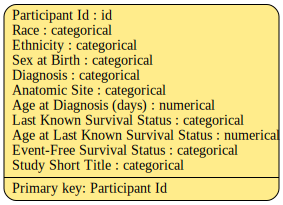

In [47]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
data = pd.read_csv('data_with_primary_key.csv')
# write a metadata object to describe the data, primary key, etc.
# this can be done manually or you can auto-detect/update it
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
metadata.set_primary_key(column_name='Participant Id')
metadata.visualize()

4587    1147.0
4588      24.0
4589    2054.0
4590    1101.0
4591    2517.0
Name: Age at Diagnosis (days), dtype: float64


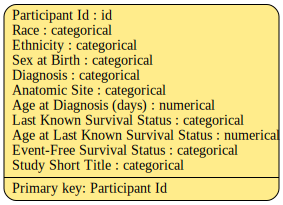

In [48]:
# Convert 'Age at Diagnosis (days)' to float
data['Age at Diagnosis (days)'] = data['Age at Diagnosis (days)'].astype(float)

# Check the conversion
print(data['Age at Diagnosis (days)'].tail())
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

metadata.visualize()

In [49]:

model = CTGANSynthesizer(metadata)
model.fit(data)

model.save("sdv-ctgan-cncer.pkl")
new_data = model.sample(num_rows=6000)
new_data.head()


C:\Users\Vinod\anaconda3\envs\python38a\lib\site-packages\sdv\single_table\base.py:92: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title
0,sdv-id-gGXSRM,Unknown,Unknown,Male,"Pleomorphic xanthoastrocytoma, NOS",Blood,6055.0,Unknown,2736.0,Not Reported,Pediatric Preclinical Testing Consortium (PPTC)
1,sdv-id-tuRrsU,Unknown,Not Reported,Male,"Glioma, malignant","Eye, NOS",5672.0,Not Reported,-941.0,Unknown,CCDI MCI
2,sdv-id-EmUDtk,Black or African American,Not Hispanic or Latino,Male,"Sarcoma, NOS","Connective, subcutaneous and other soft tissue...",3974.0,Not Reported,-962.0,Unknown,CCDI MCI
3,sdv-id-iMryUC,Black or African American,Not Hispanic or Latino,Female,Alveolar rhabdomyosarcoma,"Brain, NOS",5631.0,Not Reported,-980.0,Unknown,CCDI MCI
4,sdv-id-IUaZEZ,White,Not Reported,Female,Pilocytic astrocytoma,"Brain, NOS",5076.0,Not Reported,-999.0,Unknown,CCDI MCI


In [50]:
new_data.tail()

,Participant Id,Race,Ethnicity,Sex at Birth,Diagnosis,Anatomic Site,Age at Diagnosis (days),Last Known Survival Status,Age at Last Known Survival Status,Event-Free Survival Status,Study Short Title
5995,sdv-id-LSQncD,Unknown,Hispanic or Latino,Male,"Papillary carcinoma, NOS",Blood,4167.0,Alive,4029.0,Not Reported,Genomic Analysis in Pediatric Malignancies
5996,sdv-id-rRVJDe,Unknown,Unknown,Male,"Juvenile myelomonocytic leukemia, NOS",Blood,5910.0,Alive,3291.0,Not Reported,Genomic Characterization: Juvenile Myelo Monoc...
5997,sdv-id-GMINLR,Unknown,Hispanic or Latino,Male,"Pleomorphic xanthoastrocytoma, NOS","Thorax, NOS",4011.0,Alive,3910.0,Not Reported,Genomic Analysis in Pediatric Malignancies
5998,sdv-id-dXYgVJ,Not Reported,Not Hispanic or Latino,Female,"Ependymoma, anaplastic",Thyroid gland,629.0,Not Reported,-999.0,Unknown,CCDI MCI
5999,sdv-id-YsvMGH,Unknown,Unknown,Male,"Medulloblastoma, NOS","Cerebellum, NOS",5750.0,Dead,-999.0,Unknown,CCDI MCI


In [51]:

new_data.to_csv('new_data_with_primary_key.csv')

In [52]:
participant_count = data['Participant Id'].nunique()

# Display the results
print(f'Number of unique participants in original cleaned data: {participant_count}')

Number of unique participants in original cleaned data: 4592


In [53]:
# Sample 4592 rows from the synthetic data
sampled_data = new_data.sample(n=4592, random_state=42)  # random_state is used for reproducibility


In [54]:
# Step 4: Combine original and synthetic data
combined_data = pd.concat([data, sampled_data], ignore_index=True)

# Step 5: Save the combined data to a CSV file
output_file_path = 'combined_original_new_data.csv'
combined_data.to_csv(output_file_path, index=False)

In [55]:
# Save the DataFrame to an Excel file without the index
combined_data.to_excel('combined_original_new_data.xlsx', index=False)

In [56]:
participant_count = combined_data['Participant Id'].nunique()

# Display the results
print(f'Number of unique participants: {participant_count}')

Number of unique participants: 9184
